# Realizēt filtrēšanu ar Furjē transformācijas palīdzību

In [1]:
import numpy as np                          # Numerical Python 
import matplotlib.pyplot as plt             # Python plotting
from PIL import Image                       # Python Imaging Library
from numpy.fft import fft2, fftshift, ifft2 # Python DFT

%matplotlib inline

Text(0.5, 1.0, 'Original image')

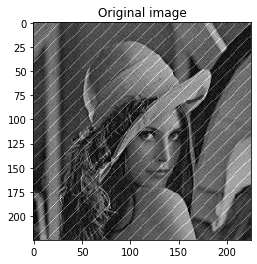

In [2]:
img = Image.open('./assets/lenna_noise.png').convert('L')
img = np.asarray(img)
plt.figure()
plt.imshow(img, plt.cm.gray)
plt.title('Original image')

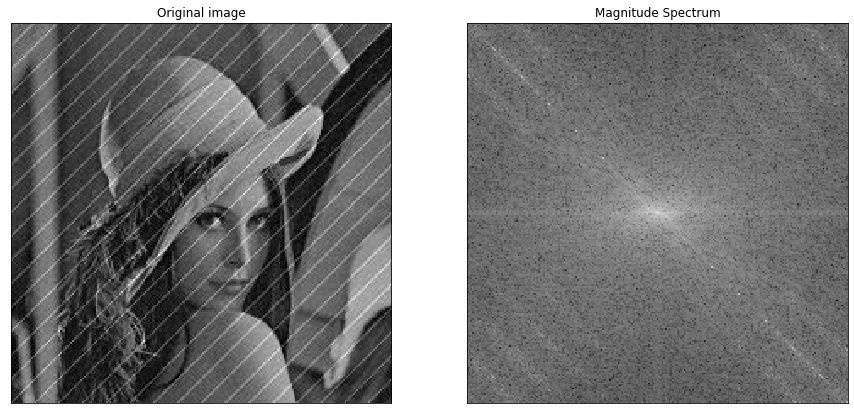

In [3]:
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)
fig.add_subplot(1,2,1)
plt.title('Original image')
plt.xticks([])
plt.yticks([])
plt.imshow(img, cmap='gray')

fig.add_subplot(1,2,2)
plt.title('Magnitude Spectrum')
plt.xticks([])
plt.yticks([])
plt.imshow(magnitude_spectrum, cmap='gray')

plt.show(block=True)

By unsetting some pixels in the magnitude spectrum, try to clean the periodic noise on the image.

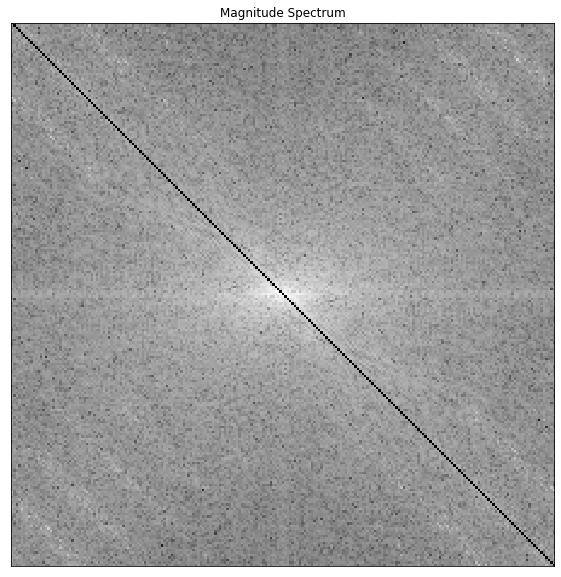

In [4]:
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

np.fill_diagonal(fshift, 1)

magnitude_spectrum = 20*np.log(np.abs(fshift))

fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(10)
plt.title('Magnitude Spectrum')
plt.xticks([])
plt.yticks([])
plt.imshow(magnitude_spectrum, cmap='gray')

Restore the image from magnitude spectrum

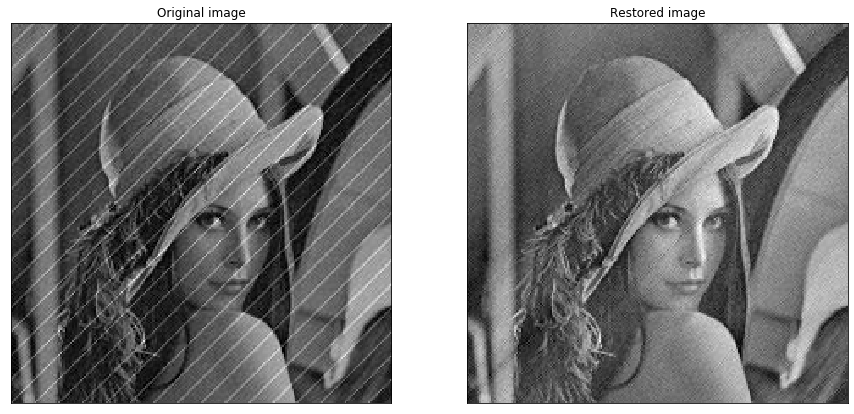

In [5]:
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.real(img_back)

fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)
fig.add_subplot(1,2,1)
plt.title('Original image')
plt.xticks([])
plt.yticks([])
plt.imshow(img, cmap='gray')

fig.add_subplot(1,2,2)
plt.title('Restored image')
plt.xticks([])
plt.yticks([])
plt.imshow(img_back, cmap='gray')

plt.show(block=True)